# Cálculos de ceros de funciones
#### https://meet.noysi.com/metodosnumericos1

## Métodos de un punto

Todos los métodos de un punto se pueden considerar como una variante del método del punto fijo, así que comenzaremos por este. Si tenemos una función F y queremos calcular n iteraciones del método del punto fijo (para aproximar un punto fijo), podemos hacer:

In [2]:
def punto_fijo(F,x0,n):
    # Versión iterativa del método del punto fijo.
    # Recibe una función F, un punto del dominio x0 y un número natural n
    # y devuelve la composición de n veces F aplicado a x0
    xn = copy(x0)
    for _ in range(n):
        xn  = F(xn) 
    return xn

In [2]:
@cached_function
def punto_fijo_r(F,x0,n):
    # Versión recursiva del método del punto fijo.
    # Recibe una función F, un punto del dominio x0 y un número natural n
    # y devuelve la composición de n veces F aplicado a x0
    if n==0:
        return x0
    xn1 = punto_fijo(F,x0,n-1) # Calculamos el paso anterior por recursividad
    xn  = F(xn1) 
    return xn

In [5]:
F(x) = exp(-x)
punto_fijo(F,1.0,10)

0.568428725029061

Gráficamente podemos representar los puntos en un diagrama de teleraña o de Verhulst. Para ello representamos la función, la gráfica de $y=x$ y los puntos
$$(x_0,x_0), (x_0,x_1), (x_1,x_1), (x_1,x_2), \dots $$

In [6]:
# Sucesión de puntos del método 
xn = [punto_fijo_r(F,1.0,n) for n in [0..10]]

In [7]:
# Necesitamos los pares de puntos (x_n, x_{n+1})
pares = [ (xn[i],xn[i+1]) for i in [0 .. 10-1] ]

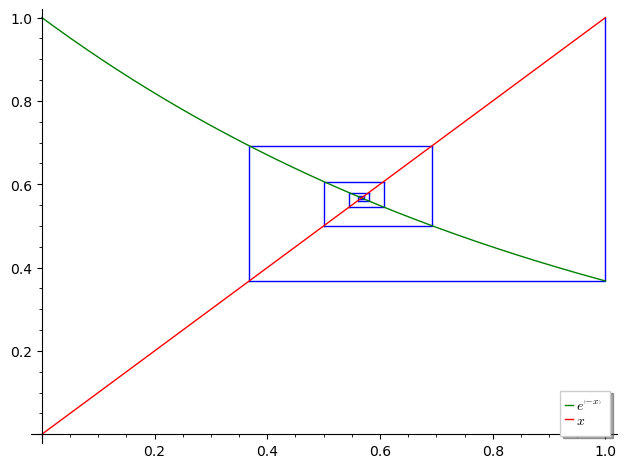

In [8]:
# Dibujamos las gráficas
sum([line([(xn,xn),(xn,xn1),(xn1,xn1)]) for xn,xn1 in pares])\
+plot(F(x),(x,0,1),color='green',legend_label=r'$'+latex(F(x))+'$')\
+plot(x,(x,0,1),color='red',legend_label=r'$x$')

<div class="alert alert-block alert-info">
<strong>Ejercicio 1. </strong> 

a. Consideremos la función $F(x)=-a x(1-x^2)$. Dicha función tiene un punto fijo en $x=0$. Probar el método del punto fijo para $a=0.9$ y $a=1.1$ y distintas condiciones iniciales. En el primer caso, debería converger al punto fijo si tomamos un entorno suficientemente pequeño y en el segundo no. ¿Qué ocurre si $a=1$?

b. Consideremos la función $F(x)=-a x(1+x^2)$. Dicha función tiene un punto fijo en $x=0$. Probar el método del punto fijo para $a=0.9$ y $a=1.1$ y distintas condiciones iniciales. En el primer caso, debería converger al punto fijo si tomamos un entorno suficientemente pequeño y en el segundo no. ¿Qué ocurre si $a=1$? 

c. Volvamos a la función del primer apartado con $a=0.9$ y $x_0=1.$. Aplica la estimación de Aitken para que el método se detenga cuando la estimación del error sea menor que $10^{-2}$. Compara la estimación con el error real en módulo

</div>

In [46]:
a = 0.9
F(x) = -a*x*(1-x^2)
x0 = 1.4529664
xn = [punto_fijo_r(F,x0,n) for n in [0..10]]
xn

[1.45296640000000,
 1.45296672484851,
 1.45296828412198,
 1.45297576864922,
 1.45301169471539,
 1.45318414756133,
 1.45401209930379,
 1.45799037299699,
 1.47718093067920,
 1.57150949755550,
 2.07860086762471]

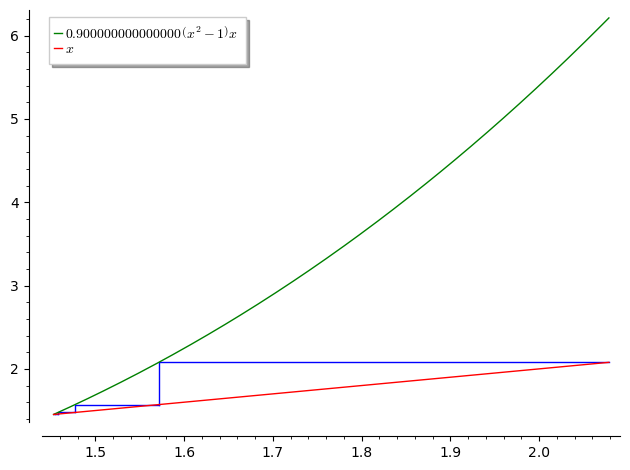

In [47]:
pares = [ (xn[i],xn[i+1]) for i in [0 .. 10-1] ]
sum([line([(xn,xn),(xn,xn1),(xn1,xn1)]) for xn,xn1 in pares])\
+plot(F(x),(x,min(xn),max(xn)),color='green',legend_label=r'$'+latex(F(x))+'$')\
+plot(x,(x,min(xn),max(xn)),color='red',legend_label=r'$x$')

In [48]:
a = 1.1
F(x) = -a*x*(1-x^2)
x0 = 0.5
xn = [punto_fijo_r(F,x0,n) for n in [0..10]]
xn

[0.500000000000000,
 -0.412500000000000,
 0.376541601562500,
 -0.355469604751085,
 0.341608243865102,
 -0.331918248811324,
 0.324885997682849,
 -0.319653382946659,
 0.315690923250387,
 -0.312651818844951,
 0.310298715023900]

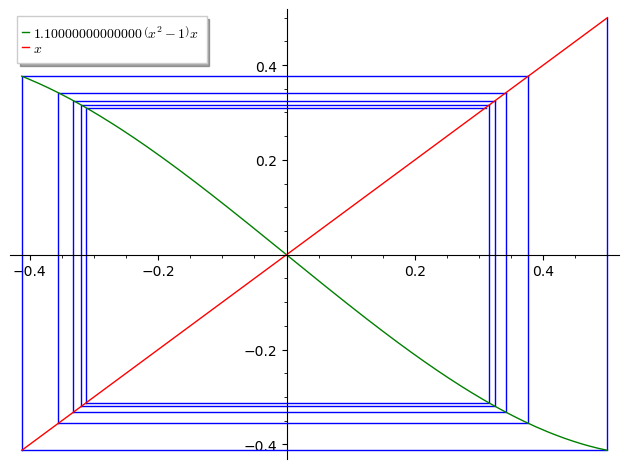

In [49]:
pares = [ (xn[i],xn[i+1]) for i in [0 .. 10-1] ]
sum([line([(xn,xn),(xn,xn1),(xn1,xn1)]) for xn,xn1 in pares])\
+plot(F(x),(x,min(xn),max(xn)),color='green',legend_label=r'$'+latex(F(x))+'$')\
+plot(x,(x,min(xn),max(xn)),color='red',legend_label=r'$x$')

<div class="alert alert-block alert-info">
<strong>Ejercicio 2. </strong> 
 
a. Usando el método del punto fijo, aplica el método de Newton-Rapson para aproximar un cero de 
 $f(x)=e^{-x}-x$.
    
b. Dibuja la gráfica de la función $f(x)=\exp(x)-3x$ y de sus derivadas primera y segunda en $[0,1]$. A partir de las gráficas, encuentra un intervalo de modo que si $x_0$ pertenece a ese intervalo, el método de Newton-Raphson converja al cero de $f$.

c. Consideremos la función $f(x) = \sin(x)$. Encontrar una condición inicial $x_0$ en $[-\pi/2,\pi/2]$ distinta de $0$ de modo que al aplicar el método de Newton-Raphson converja a $0$. Idem para que no converja a $0$. Encontrar una condición inicial en $[\pi/2,\pi]$ de modo que al aplicar el método de Newton-Raphson no converja a $0$. Idem para que sí converja a $0$.

</div>

a)

In [3]:
f(x) = exp(-x) - x

In [6]:
x0 = 0.5

In [9]:
x1 = x0 - f(x0)/f.diff()(x0)

In [11]:
x2 = x1 - f(x1)/f.diff()(x1)
x3 = x2 - f(x2)/f.diff()(x2)
x4 = x3 - f(x3)/f.diff()(x3)
x1,x2,x3,x4

(0.566311003197218, 0.567143165034862, 0.567143290409781, 0.567143290409784)

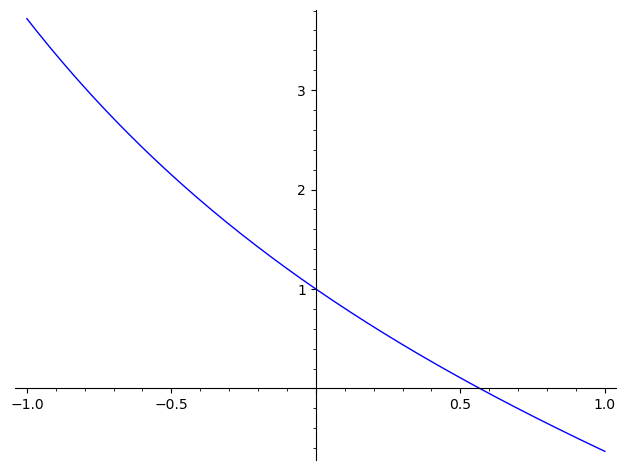

In [13]:
plot(f)

In [15]:
F(x) = x - f(x)/f.diff()(x)
punto_fijo(F,0.5,1)

0.566311003197218

b)

c)

In [23]:
f(x) = sin(x)
F(x) = x - f(x)/f.diff()(x)

In [65]:
ap = [punto_fijo(F,1.945,k) for k in [0 .. 7]] # 1.95 está en el intervalo buscado

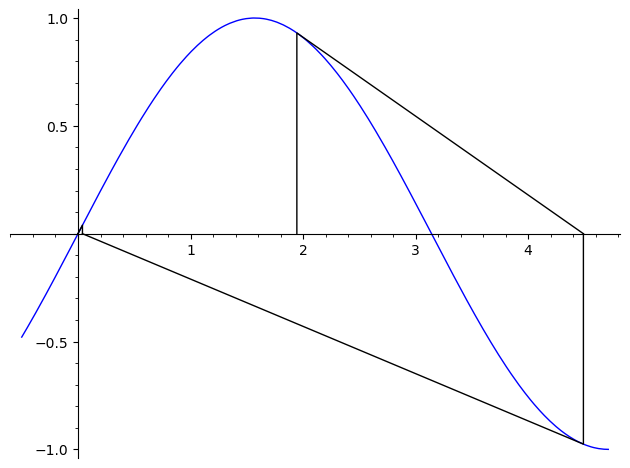

In [66]:
plot(sin(x),(x,-0.5,3*pi/2)) + \
sum( [ line([ (ap[k],0) , (ap[k],f(ap[k])) , (ap[k+1],0) ], color='black')  for k in [0 .. 6]] )

<div class="alert alert-block alert-info">
<strong>Ejercicio 3. </strong> 
 
a. Aproxima el mínimo de $f(x)=x^2+e^{-x}$ aplicando el método de Newton-Raphson.

b. Aproxima la distancia con la norma del supremo entre las funciones $\cos(x)$ y $p(x)=1-(2x/\pi)^2$, para $x\in[-\pi/2,\pi/2]$.
</div>

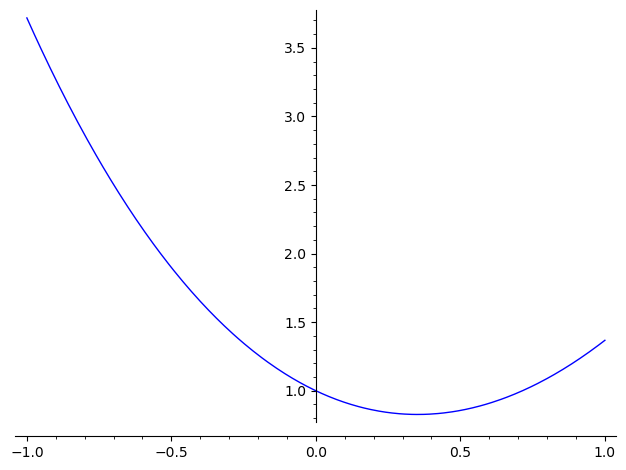

In [1]:
g(x) = x^2 + exp(-x)
plot(g)

In [4]:
f = g.diff()

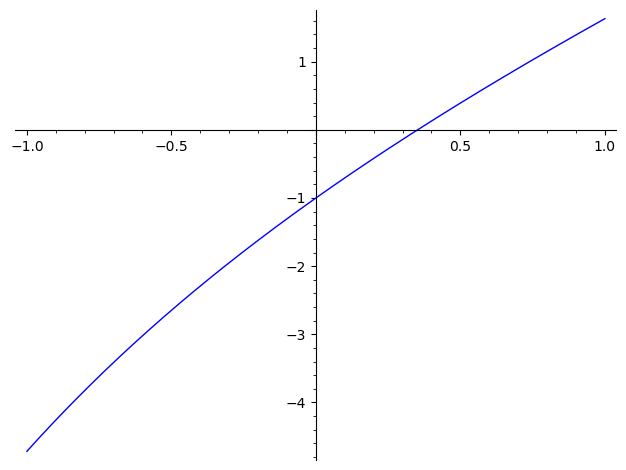

In [5]:
plot(f)

In [7]:
F(x) = x - f(x)/f.diff()(x)
s = punto_fijo(F,0.3,4)
s

0.351733711249196

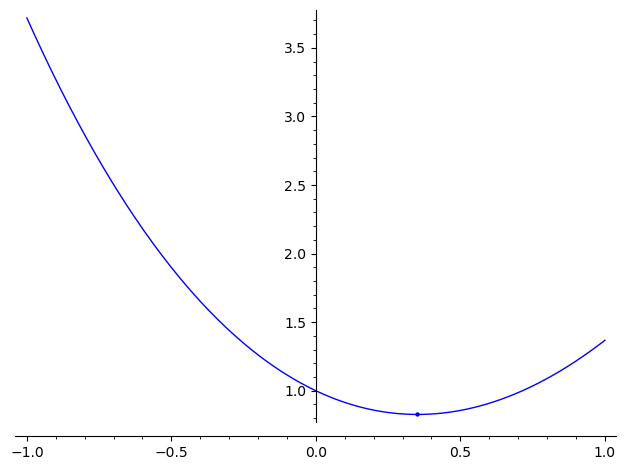

In [8]:
plot(g) + point([s,g(s)])

<div class="alert alert-block alert-info">
<strong>Ejercicio 4. </strong> 
 
a. Encuentra un ejemplo de una función $F$ tal que tenga un punto $x_0$ de modo que $x_1 = F(x_0)$ y $x_0= F(x_1)$, pero esto no ocurra para todo punto. 
    
b. Encuentra un ejemplo de una función $F$ tal que tenga un punto $x_0$ de modo que $x_1 = F(x_0)$, $x_2= F(x_1)$ y $x_0=F(x_2)$. 
 
c. Encuentra un ejemplo de una función $f$ de clase 2 tal que al aplicar el método de Newton-Raphson para cierto $x_0$ tengamos que $x_0=x_2$, pero esto no ocurra para todo punto $x_0$. 
    
d. Encuentra un ejemplo de una función $f$ de clase 2 tal que al aplicar el método de Newton-Raphson para cierto $x_0$ tengamos que $x_0=x_3$. 
    
</div>

## <font color='green'>Métodos iterativos y sistemas dinámicos (opcional)</font>

### Método del punto fijo y sistemas caóticos

Vamos a aplicar el método del punto fijo a la función $F(x)=2x$, que es continua si tomamos $[0,1]\times[0,1]$ como el toro (es decir, pegamos los bordes izquierdo y derecho y el superior e inferior).

In [ ]:
@cached_function # Tenemos que evitar que el método recalcule muchas veces los mismos valores
def punto_fijo(F,x0,n):
    if n==0:
        return x0
    return F(punto_fijo(F,x0,n-1))

In [ ]:
def F(x):
    if x <= 1/2:
        return 2*x
    return 2*x-1

Esta función tiene un único punto fijo $(0,0)$ (ó cualquiera de sus equivalentes, $(1,1)$, $(0,1)$, $(1,0)$)

In [ ]:
d1 = line([(k,2*k) for k in [0,1/2]])+line([(k,2*k-1) for k in [1/2,1]])
d1+plot(x,(x,0,1),color='red')

Sin embargo, como la derivada es mayor que 1 en todo punto, el método del punto fijo no puede converger a dicho valor. Es más, si comenzamos en un valor racional, al cabo de un cierto número de iteraciones volvemos al mismo punto, mientras que si es irracional, no podemos volver nunca al mismo punto.

In [ ]:
x0 = 15/37
# x0 = sqrt(3)/2
puntos = [x0]
for _ in range(1200): # Ojo, estamos trabajando con racionales, esto consume tiempo
    puntos+=[F(puntos[-1])]
    if puntos[-1]==x0:
        break
iter = []
for p in puntos:
    iter+= [(p,p)] +[(p,F(p))] 
d1+plot(x,(x,0,1),color='red') + line(iter,color='green',xmax=1,ymax=1)

### Método de Newton-Raphson y fractales

Vamos a aplicar el método de Newton-Raphson a la función $x^3-1$ en los complejos. Como dicho polinomio tiene tres raíces, dependiendo de la condición inicial vamos a converger a una de ellas (si el método converge). Vamos a representar cada condición inicial con un color según a cuál de las tres raíces converja.

In [ ]:
%%cython -a

import numpy

# Nuestra función es x^3-1 (puedes probar a cambiarla)
def f(x):
    return x**3-1

# En df guardamos la derivada (hay que escribirla 'a mano') 
def df(x):
    return 3*x**2
    
# Programamos el método de Newton-Rapson.  
def NR(c):
    for i in range(20):  # Permitimos como máximo 5 iteraciones
        cant=c
        if df(c)!=0:
            c=c-(f(c)/df(c))
        if abs(c-cant) < 0.01: # Cuando el error sea pequeño, devolveremos la parte imaginaria del número (coordenada y).
            return c.imag
    return 0.0
    
def NRfractal(x0,y0,side,N=50): #, int L=50, float R=3):
      '''Calcula una matriz NxN, donde el valor en cada posición será el resultado de aplicar NR al número complejo de la malla creada'''
      m = numpy.zeros((N,N), dtype=numpy.float64)
      I = complex(0,1)
      px = numpy.linspace(x0, x0+side, N)
      py = numpy.linspace(y0, y0+side, N)
      Mx, My = numpy.meshgrid(px, py)
      C=Mx + I*My
      m=numpy.array([[NR(c) for c in fila] for fila in C])
      return m

In [ ]:
m=NRfractal(-3, -3, 6, 500)
matrix_plot(matrix(m),cmap='prism',frame=false)